# Predict which customers will default on a loan

In this project, we will aim to find out if a applicant will default on a loan.

We'll analyze existing data about the customer information by following steps:

* Exploratory Data Analysis (EDA)
 * Plots to study trends
 * Data Cleaning
 * Variable Transformations
* Data preposessing and feature selection
* Model Building and Validation
* Final results





In [74]:
# Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# Loading Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Quick exploration of the data

In [76]:
train.head()

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target
0,1,1993-03-14,1,0.036495,0.208897,2400,6,2,0,0,570,817,0
1,2,1966-09-27,1,0.023423,0.260438,2200,6,1,0,0,741,756,0
2,3,1931-01-11,2,0.027205,0.335922,3000,6,1,0,1,805,779,0
3,4,1953-01-07,1,0.009141,0.353779,2100,2,4,0,0,573,829,0
4,5,1943-11-17,0,0.068424,0.314966,2500,2,3,0,0,833,629,0


In [77]:
test.head()

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2
0,14,1980-05-15,0,0.001010,0.289556,2000,6,0,1,0,837,518
1,24,1967-06-09,0,0.032225,0.368951,2600,5,2,0,0,731,656
2,83,1946-09-07,0,0.019998,0.265779,2200,4,0,0,0,644,784
3,104,1991-07-25,2,0.052280,0.415845,2100,3,2,0,0,573,686
4,127,1948-09-17,0,0.070865,0.193792,2000,4,1,0,1,777,747


In [78]:
train.shape

(20839, 13)

In [79]:
test.shape

(1000, 12)

In [80]:
train.describe()

,id,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target
count,20839.000000,20839.000000,2.083900e+04,20839.000000,20839.000000,20839.000000,20839.000000,20839.000000,20839.000000,20839.000000,20839.00000,20839.000000
mean,10923.946878,0.483421,4.815929e-02,0.333507,2290.772110,4.997745,2.027497,0.098901,0.098901,669.511637,669.29440,0.102164
std,6295.585008,0.719653,4.571744e-02,0.117332,320.090288,2.248021,1.431671,0.314963,0.315420,98.005767,98.60763,0.302871
min,1.000000,-1.000000,3.932283e-07,0.029386,2000.000000,0.000000,0.000000,0.000000,0.000000,500.000000,500.00000,0.000000
25%,5482.000000,0.000000,1.436676e-02,0.247782,2100.000000,3.000000,1.000000,0.000000,0.000000,584.000000,583.00000,0.000000
50%,10929.000000,0.000000,3.478343e-02,0.325432,2200.000000,5.000000,2.000000,0.000000,0.000000,669.000000,670.00000,0.000000
75%,16366.500000,1.000000,6.789546e-02,0.411210,2400.000000,6.000000,3.000000,0.000000,0.000000,755.000000,754.00000,0.000000
max,21839.000000,6.000000,5.387018e-01,0.801838,5000.000000,15.000000,9.000000,3.000000,3.000000,839.000000,839.00000,1.000000


In [81]:
train.groupby(train['target'])['id'].count()

target
0    18710
1     2129
Name: id, dtype: int64

# Detect missing value

In [82]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [83]:
missing_values_table(train)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


we don't have any missing value

# DATA Prepocessing

* Change the value in number_90_days_past_due to 0/1, means either this customer past due day or not
* Removed the records when age > 95
* Change the value in number_charged_off to 0/1, means either this customer got charged_off or not
* Removed date_of_birth, add a new Column named age (Calculate the age of the customer based on date_of_birth data)
* Data transformation for credit_utilization and monthly_income column

In [84]:
#transfer date_of_birth to age
from datetime import datetime
from datetime import date
def calculate_age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
train['age'] = train['date_of_birth'].apply(calculate_age)
train.head()

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target,age
0,1,1993-03-14,1,0.036495,0.208897,2400,6,2,0,0,570,817,0,26
1,2,1966-09-27,1,0.023423,0.260438,2200,6,1,0,0,741,756,0,52
2,3,1931-01-11,2,0.027205,0.335922,3000,6,1,0,1,805,779,0,88
3,4,1953-01-07,1,0.009141,0.353779,2100,2,4,0,0,573,829,0,66
4,5,1943-11-17,0,0.068424,0.314966,2500,2,3,0,0,833,629,0,75


In [85]:
# delete all rows with column 'Age' has value > 95
indexNames = train[(train['age'] >= 95)].index
train.drop(indexNames , inplace=True)

In [86]:
#Different Age Groups 
def age (row) :
   if row['age'] <= 18 :
      return '0-18'
   if (row['age'] <= 34) and (row['age'] > 18):
      return '18-34'
   if (row['age'] <= 50) and (row['age'] > 34):
      return '34-50' 
   if (row['age'] <= 70) and (row['age'] > 50):
      return '50-70'  
   else :
      return '>70'
train['age_groups'] = train.apply (lambda row: age (row), axis=1)

train.head()

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target,age,age_groups
0,1,1993-03-14,1,0.036495,0.208897,2400,6,2,0,0,570,817,0,26,18-34
1,2,1966-09-27,1,0.023423,0.260438,2200,6,1,0,0,741,756,0,52,50-70
2,3,1931-01-11,2,0.027205,0.335922,3000,6,1,0,1,805,779,0,88,>70
3,4,1953-01-07,1,0.009141,0.353779,2100,2,4,0,0,573,829,0,66,50-70
4,5,1943-11-17,0,0.068424,0.314966,2500,2,3,0,0,833,629,0,75,>70


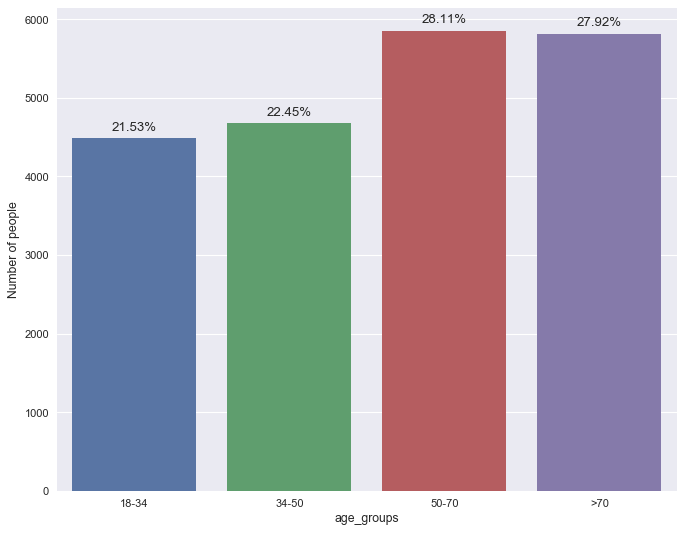

In [87]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
plt.tight_layout()
total=train.id.count()
sns.set(style="darkgrid")
ax=sns.countplot(x= train['age_groups'].sort_values())
plt.ylabel('Number of people')
plt.xlabel('age_groups')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}%'.format((height/total)*100),
            ha="center",)
plt.show()

In [88]:
#Different income Groups 
def monthly_income(row) :
   if row['monthly_income'] <= 2100 :
      return '20k-21k' 
   if (row['monthly_income'] <= 2200) and (row['monthly_income'] > 2100):
      return '21k-22k'  
   if (row['monthly_income'] <= 2500) and (row['monthly_income'] > 2200):
      return '22k-25k'
   if (row['monthly_income'] <= 3000) and (row['monthly_income'] > 2500):
      return '25k-30k' 
   else :
      return '>30k'
    
train['monthly_income_group'] = train.apply (lambda row: monthly_income (row), axis=1)

train.head()

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target,age,age_groups,monthly_income_group
0,1,1993-03-14,1,0.036495,0.208897,2400,6,2,0,0,570,817,0,26,18-34,22k-25k
1,2,1966-09-27,1,0.023423,0.260438,2200,6,1,0,0,741,756,0,52,50-70,21k-22k
2,3,1931-01-11,2,0.027205,0.335922,3000,6,1,0,1,805,779,0,88,>70,25k-30k
3,4,1953-01-07,1,0.009141,0.353779,2100,2,4,0,0,573,829,0,66,50-70,20k-21k
4,5,1943-11-17,0,0.068424,0.314966,2500,2,3,0,0,833,629,0,75,>70,22k-25k


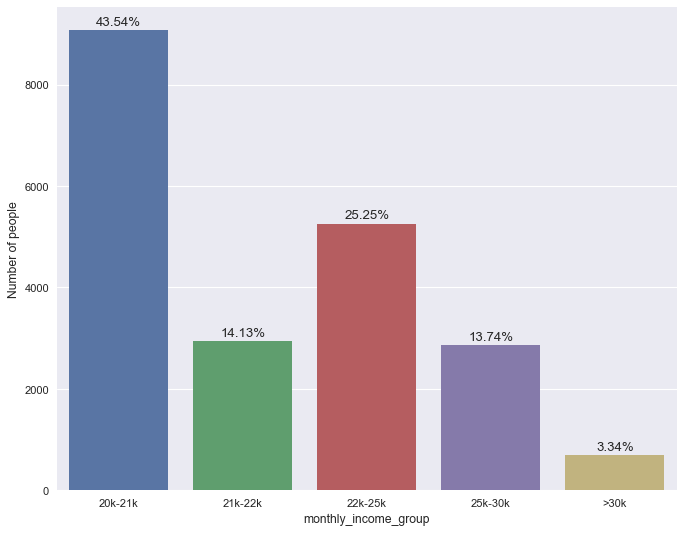

In [89]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
plt.tight_layout()
total=train.id.count()
sns.set(style="darkgrid")
ax=sns.countplot(x= train['monthly_income_group'].sort_values())
plt.ylabel('Number of people')
plt.xlabel('monthly_income_group')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}%'.format((height/total)*100),
            ha="center",)
plt.show()

In [90]:
#Different debt_to_income_ratio Groups 
def debt_to_income_ratio(row) :
   if row['debt_to_income_ratio'] <= 0.2 :
      return '0-0.2' 
   if (row['debt_to_income_ratio'] <= 0.3) and (row['debt_to_income_ratio'] > 0.2):
      return '0.2-0.3'  
   if (row['debt_to_income_ratio'] <= 0.4) and (row['debt_to_income_ratio'] > 0.3):
      return '0.3-0.4' 
   if (row['debt_to_income_ratio'] <= 0.6) and (row['debt_to_income_ratio'] > 0.4):
      return '0.4-0.6' 
   else :
      return '>0.6'
    
train['debt_to_income_ratio_group'] = train.apply (lambda row: debt_to_income_ratio (row), axis=1)

train.head()

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target,age,age_groups,monthly_income_group,debt_to_income_ratio_group
0,1,1993-03-14,1,0.036495,0.208897,2400,6,2,0,0,570,817,0,26,18-34,22k-25k,0.2-0.3
1,2,1966-09-27,1,0.023423,0.260438,2200,6,1,0,0,741,756,0,52,50-70,21k-22k,0.2-0.3
2,3,1931-01-11,2,0.027205,0.335922,3000,6,1,0,1,805,779,0,88,>70,25k-30k,0.3-0.4
3,4,1953-01-07,1,0.009141,0.353779,2100,2,4,0,0,573,829,0,66,50-70,20k-21k,0.3-0.4
4,5,1943-11-17,0,0.068424,0.314966,2500,2,3,0,0,833,629,0,75,>70,22k-25k,0.3-0.4


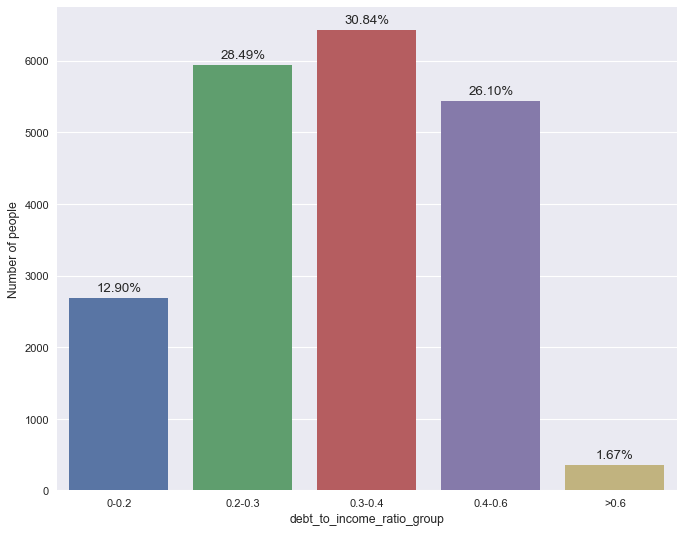

In [91]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
plt.tight_layout()
total=train.id.count()
sns.set(style="darkgrid")
ax=sns.countplot(x= train['debt_to_income_ratio_group'].sort_values())
plt.ylabel('Number of people')
plt.xlabel('debt_to_income_ratio_group')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}%'.format((height/total)*100),
            ha="center",)
plt.show()

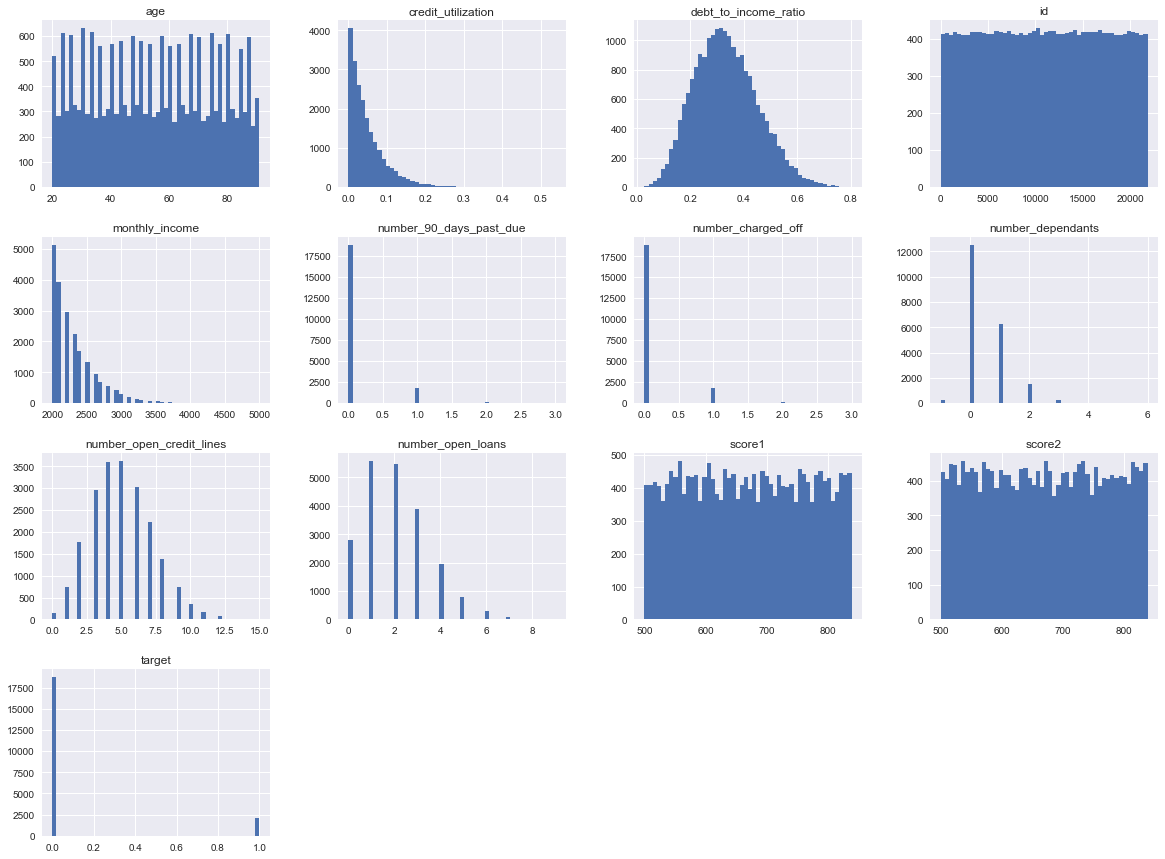

In [92]:
#View the dat distribution for each column
train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

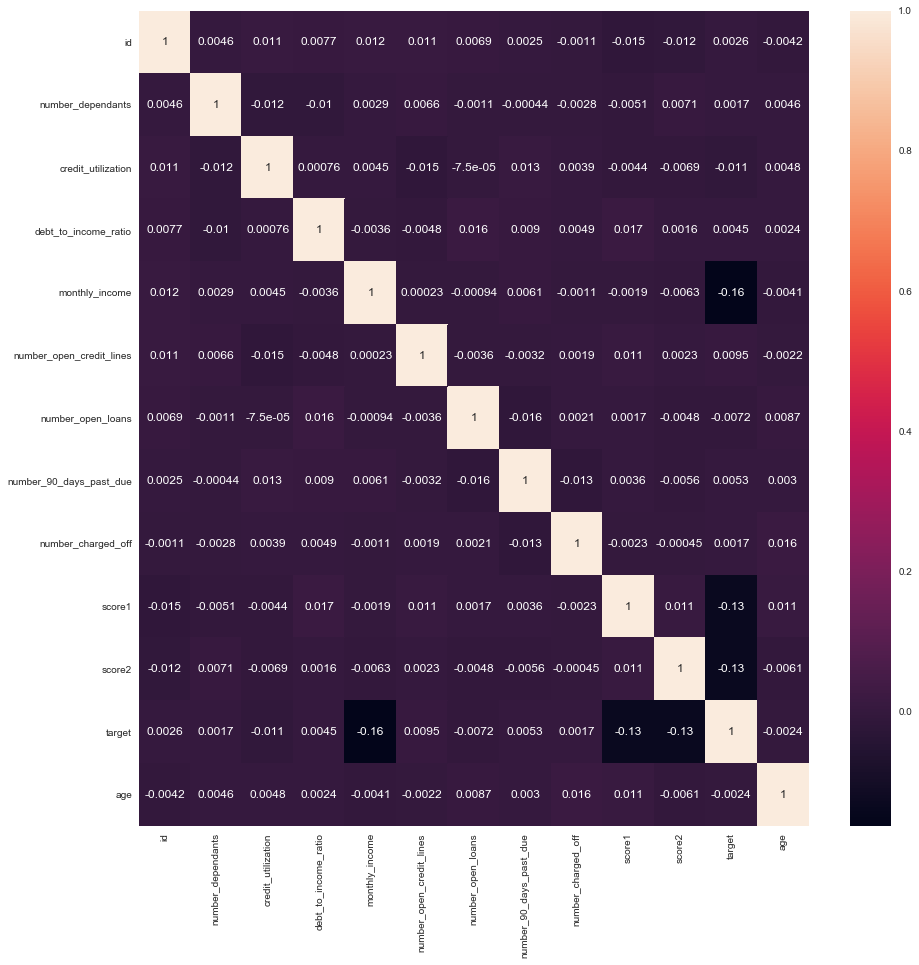

In [93]:
#Correlation Heatmap 
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(train.corr(), annot=True)

In [94]:
#since we have 2 score, just wanna check if the score1 relate to score2
def score_1_bin (row) :
   if row['score1'] <= 548 :
      return 'G'
   if (row['score1'] <= 596) and (row['score1'] > 548):
      return 'F'
   if (row['score1'] <= 644) and (row['score1'] > 596):
      return 'E' 
   if (row['score1'] <= 692) and (row['score1'] > 644):
      return 'D' 
   if (row['score1'] <= 740) and (row['score1'] > 692):
      return 'C'  
   if (row['score1'] <= 788) and (row['score1'] > 740):
      return 'B'  
   else :
      return 'A'

In [95]:
train['score_1_bin'] = train.apply (lambda row: score_1_bin (row), axis=1)
train.head()

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target,age,age_groups,monthly_income_group,debt_to_income_ratio_group,score_1_bin
0,1,1993-03-14,1,0.036495,0.208897,2400,6,2,0,0,570,817,0,26,18-34,22k-25k,0.2-0.3,F
1,2,1966-09-27,1,0.023423,0.260438,2200,6,1,0,0,741,756,0,52,50-70,21k-22k,0.2-0.3,B
2,3,1931-01-11,2,0.027205,0.335922,3000,6,1,0,1,805,779,0,88,>70,25k-30k,0.3-0.4,A
3,4,1953-01-07,1,0.009141,0.353779,2100,2,4,0,0,573,829,0,66,50-70,20k-21k,0.3-0.4,F
4,5,1943-11-17,0,0.068424,0.314966,2500,2,3,0,0,833,629,0,75,>70,22k-25k,0.3-0.4,A


In [96]:
def score_2_bin (row) :
   if row['score2'] <= 548 :
      return 'G'
   if (row['score2'] <= 596) and (row['score2'] > 548):
      return 'F'
   if (row['score2'] <= 644) and (row['score2'] > 596):
      return 'E' 
   if (row['score2'] <= 692) and (row['score2'] > 644):
      return 'D' 
   if (row['score2'] <= 740) and (row['score2'] > 692):
      return 'C'  
   if (row['score2'] <= 788) and (row['score2'] > 740):
      return 'B'  
   else :
      return 'A'

In [97]:
train['score_2_bin'] = train.apply (lambda row: score_2_bin (row), axis=1)
train.head()

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target,age,age_groups,monthly_income_group,debt_to_income_ratio_group,score_1_bin,score_2_bin
0,1,1993-03-14,1,0.036495,0.208897,2400,6,2,0,0,570,817,0,26,18-34,22k-25k,0.2-0.3,F,A
1,2,1966-09-27,1,0.023423,0.260438,2200,6,1,0,0,741,756,0,52,50-70,21k-22k,0.2-0.3,B,B
2,3,1931-01-11,2,0.027205,0.335922,3000,6,1,0,1,805,779,0,88,>70,25k-30k,0.3-0.4,A,B
3,4,1953-01-07,1,0.009141,0.353779,2100,2,4,0,0,573,829,0,66,50-70,20k-21k,0.3-0.4,F,A
4,5,1943-11-17,0,0.068424,0.314966,2500,2,3,0,0,833,629,0,75,>70,22k-25k,0.3-0.4,A,E


(array([2.171e+03, 5.132e+03, 5.789e+03, 4.275e+03, 2.267e+03, 9.210e+02,
        2.400e+02, 3.300e+01, 3.000e+00, 1.000e+00]),
 array([6.27079159e-04, 7.39606804e-02, 1.47294282e-01, 2.20627883e-01,
        2.93961484e-01, 3.67295085e-01, 4.40628686e-01, 5.13962288e-01,
        5.87295889e-01, 6.60629490e-01, 7.33963091e-01]),
 <a list of 10 Patch objects>)

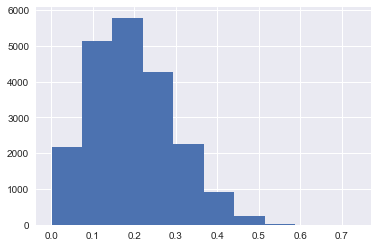

In [98]:
#transfrom left skewed data
train['credit_utilization'] = train['credit_utilization']**0.5
plt.hist(train['credit_utilization'])

(array([9.071e+03, 6.871e+03, 2.272e+03, 1.226e+03, 8.960e+02, 3.140e+02,
        1.240e+02, 4.400e+01, 1.300e+01, 1.000e+00]),
 array([7.60090246, 7.69253153, 7.78416061, 7.87578968, 7.96741875,
        8.05904783, 8.1506769 , 8.24230597, 8.33393505, 8.42556412,
        8.51719319]),
 <a list of 10 Patch objects>)

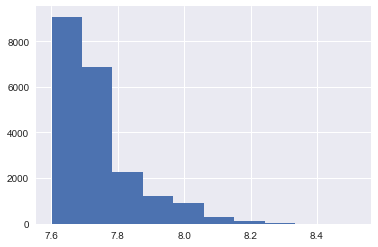

In [99]:
#transfrom the data
train['monthly_income'] = np.log(train['monthly_income'])
plt.hist(train['monthly_income'])

In [101]:
# Dropping variables
train_clean = train.drop(['id','date_of_birth','age_groups','monthly_income_group','debt_to_income_ratio_group','score_1_bin','score_2_bin'  ], axis=1)
train_clean.head()

,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target,age
0,1,0.191036,0.208897,7.783224,6,2,0,0,570,817,0,26
1,1,0.153044,0.260438,7.696213,6,1,0,0,741,756,0,52
2,2,0.164940,0.335922,8.006368,6,1,0,1,805,779,0,88
3,1,0.095611,0.353779,7.649693,2,4,0,0,573,829,0,66
4,0,0.261580,0.314966,7.824046,2,3,0,0,833,629,0,75


# Resampling due to imbalance data

Class 0: 18704
Class 1: 2128
Proportion: 8.79 : 1


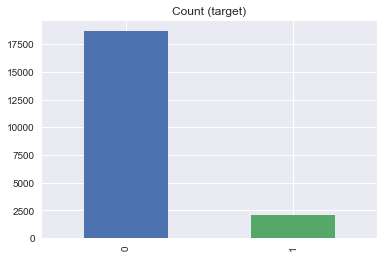

In [102]:
target_count = train_clean.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [103]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate input features and target
y1 = train_clean.target
X1 = train_clean.drop('target', axis=1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=27)

#only use oversampling on the training data
sm = SMOTE(random_state=12, ratio = 1.0)
x1_train_res, y1_train_res = sm.fit_sample(X1_train, y1_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


# Feature Selection

In [104]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
# create the RFE model and select 3 attributes
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(x1_train_res,y1_train_res)
rfe = RFE(clf_LR, 10)
rfe = rfe.fit(train_clean.iloc[:,:-1].values, train_clean.iloc[:,-1].values)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify th

[ True  True  True  True  True  True  True  True False  True  True]
[1 1 1 1 1 1 1 1 2 1 1]


Features are all on different scale, so it is wise to rescale all features in the range -1, +1
Also since we have 10 feature is important so we will keep those 10 features

In [105]:
from sklearn import preprocessing

y = train_clean.target
X = train_clean.drop(['target','score1'], axis=1)
X = preprocessing.scale(X)

In [106]:
#resampling after deleted unimportant variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#only use oversampling on the training data
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


# Building the model

Now, it is time to use the training set to build an accurate model and use the test set to report the accuracy of the model

The following algorithms are used and evaluated:

* LogisticRegression
* RandomForestClassifier
* DecisionTreeClassifier
* K Nearest Neighbor(KNN)
* Support Vector Machine
* AdaBoostClassifier

*Here is where a good business understanding of the practical situation comes in handy, *getting good recall is more important than getting good precision, *because as a financial *company I would be more concerned about catching more defaulters to minimize my losses rather than being very right all the time!

In [107]:
model_results_classification = pd.DataFrame(index=None, columns=['model','train_score','test_score', 'train_mse','test_mse','recall_score'])

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score

parameters={"C":np.logspace(-3,3,7)}
lr=LogisticRegression(solver='lbfgs')
CV_lr=GridSearchCV(estimator=lr, param_grid=parameters, cv= 5)
CV_lr.fit(x_train_res, y_train_res)

print("tuned hpyerparameters :(best parameters) ",CV_lr.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 0.01}


In [109]:
model_name = 'LogisticRegression'
model = LogisticRegression(C = 0.01)
model.fit(x_train_res, y_train_res)
y_train_lg = model.predict(x_train_res)
y_pred_lg = model.predict(X_test)

# Checking accuracy
train_accuracyscore = accuracy_score(y_train_res, y_train_lg)
test_accuracyscore = accuracy_score(y_test, y_pred_lg)                        
train_mse = mean_squared_error(y_train_res, y_train_lg)
test_mse = mean_squared_error(y_test, y_pred_lg)
recall = recall_score(y_test, y_pred_lg)
#Saving results
model_results_classification = model_results_classification.append(pd.Series({'model':model_name,'train_score':train_accuracyscore,'test_score':test_accuracyscore, 'train_mse':train_mse, 'test_mse':test_mse,'recall_score':recall }),ignore_index=True)
model_results_classification

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,model,train_score,test_score,train_mse,test_mse,recall_score
0,LogisticRegression,0.665514,0.620776,0.334486,0.379224,0.69434


In [110]:
from sklearn.ensemble import RandomForestClassifier

model_name = 'RandomForestClassifier'
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train_res, y_train_res)
y_train_rf = model.predict(x_train_res)
y_pred_rf = model.predict(X_test)

# Checking accuracy
train_accuracyscore = accuracy_score(y_train_res, y_train_rf)
test_accuracyscore = accuracy_score(y_test, y_pred_rf)                        
train_mse = mean_squared_error(y_train_res, y_train_rf)
test_mse = mean_squared_error(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
#Saving results
model_results_classification = model_results_classification.append(pd.Series({'model':model_name,'train_score':train_accuracyscore,'test_score':test_accuracyscore, 'train_mse':train_mse, 'test_mse':test_mse,'recall_score':recall }),ignore_index=True)
model_results_classification

,model,train_score,test_score,train_mse,test_mse,recall_score
0,LogisticRegression,0.665514,0.620776,0.334486,0.379224,0.694340
1,RandomForestClassifier,1.000000,0.886329,0.000000,0.113671,0.098113


Obviously, RandomForestClassifier has overfitting problem

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

parameters = {'n_estimators': [40, 42], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6]}
dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, oob_score=True, random_state=1) #n_estimators=70, random_state=1)

# Grid Search to determine best parameters
CV_bc = GridSearchCV(estimator=bc, param_grid=parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
CV_bc.fit(x_train_res, y_train_res)

print("tuned hpyerparameters :(best parameters) ", CV_bc.best_params_)

tuned hpyerparameters :(best parameters)  {'base_estimator__max_depth': 6, 'base_estimator__max_leaf_nodes': 15, 'n_estimators': 40}


In [112]:
model_name = 'DecisionTreeClassifier'
model_dt = DecisionTreeClassifier(max_leaf_nodes=15, max_depth=6)
model_dt.fit(x_train_res, y_train_res)
y_train_dt = model_dt.predict(x_train_res)
y_pred_dt = model_dt.predict(X_test)

# Checking accuracy
train_accuracyscore = accuracy_score(y_train_res, y_train_dt)
test_accuracyscore = accuracy_score(y_test, y_pred_dt)                        
train_mse = mean_squared_error(y_train_res, y_train_dt)
test_mse = mean_squared_error(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
#Saving results
model_results_classification = model_results_classification.append(pd.Series({'model':model_name,'train_score':train_accuracyscore,'test_score':test_accuracyscore, 'train_mse':train_mse, 'test_mse':test_mse,'recall_score':recall }),ignore_index=True)
model_results_classification

,model,train_score,test_score,train_mse,test_mse,recall_score
0,LogisticRegression,0.665514,0.620776,0.334486,0.379224,0.694340
1,RandomForestClassifier,1.000000,0.886329,0.000000,0.113671,0.098113
2,DecisionTreeClassifier,0.761942,0.737135,0.238058,0.262865,0.394340


In [113]:
model_name = 'BaggingClassifier'
model = BaggingClassifier(base_estimator=model_dt, n_estimators=42, random_state=1, oob_score=True)

model.fit(x_train_res, y_train_res)
y_train_bag = model.predict(x_train_res)
y_pred_bag = model.predict(X_test)

# Checking accuracy
train_accuracyscore = accuracy_score(y_train_res, y_train_bag)
test_accuracyscore = accuracy_score(y_test, y_pred_bag)                        
train_mse = mean_squared_error(y_train_res, y_train_bag)
test_mse = mean_squared_error(y_test, y_pred_bag)
recall = recall_score(y_test, y_pred_bag)
#Saving results
model_results_classification = model_results_classification.append(pd.Series({'model':model_name,'train_score':train_accuracyscore,'test_score':test_accuracyscore, 'train_mse':train_mse, 'test_mse':test_mse,'recall_score':recall }),ignore_index=True)
model_results_classification

,model,train_score,test_score,train_mse,test_mse,recall_score
0,LogisticRegression,0.665514,0.620776,0.334486,0.379224,0.694340
1,RandomForestClassifier,1.000000,0.886329,0.000000,0.113671,0.098113
2,DecisionTreeClassifier,0.761942,0.737135,0.238058,0.262865,0.394340
3,BaggingClassifier,0.761906,0.737135,0.238094,0.262865,0.394340


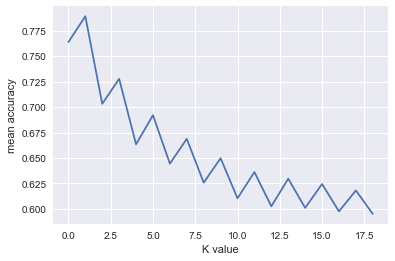

array([0.76382488, 0.78917051, 0.703149  , 0.72772657, 0.66340246,
       0.69201229, 0.64439324, 0.6687788 , 0.62576805, 0.64976959,
       0.61040707, 0.63613671, 0.60253456, 0.62960829, 0.60099846,
       0.62442396, 0.59754224, 0.61808756, 0.59504608])

In [114]:
from sklearn.neighbors import KNeighborsClassifier

kmax=20
mean_accuracy=np.zeros(kmax-1)

for k in range(1,kmax):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors=k).fit(x_train_res, y_train_res)
    y_pred = knn.predict(X_test)
    mean_accuracy[k-1]=np.mean(y_pred==y_test);
    
    


plt.plot(np.arange(19),mean_accuracy)
plt.xlabel("K value")
plt.ylabel("mean accuracy")
plt.show()
mean_accuracy

Hence, we can observe the maximum accuracy is achieved at K=2. SO we will consider K=2 as the best K value.

In [115]:
model_name = 'KNeighborsClassifier'
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train_res, y_train_res)
y_train_knn = model.predict(x_train_res)
y_pred_knn = model.predict(X_test)

# Checking accuracy
train_accuracyscore = accuracy_score(y_train_res, y_train_knn)
test_accuracyscore = accuracy_score(y_test, y_pred_knn)                        
train_mse = mean_squared_error(y_train_res, y_train_knn)
test_mse = mean_squared_error(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
#Saving results
model_results_classification = model_results_classification.append(pd.Series({'model':model_name,'train_score':train_accuracyscore,'test_score':test_accuracyscore, 'train_mse':train_mse, 'test_mse':test_mse,'recall_score':recall }),ignore_index=True)
model_results_classification

,model,train_score,test_score,train_mse,test_mse,recall_score
0,LogisticRegression,0.665514,0.620776,0.334486,0.379224,0.694340
1,RandomForestClassifier,1.000000,0.886329,0.000000,0.113671,0.098113
2,DecisionTreeClassifier,0.761942,0.737135,0.238058,0.262865,0.394340
3,BaggingClassifier,0.761906,0.737135,0.238094,0.262865,0.394340
4,KNeighborsClassifier,0.997291,0.789171,0.002709,0.210829,0.196226


In [116]:
from sklearn import svm

model_name = 'SVM'
model = svm.SVC(gamma='scale')
model.fit(x_train_res, y_train_res)
y_train_svm = model.predict(x_train_res)
y_pred_svm = model.predict(X_test)

# Checking accuracy
train_accuracyscore = accuracy_score(y_train_res, y_train_svm)
test_accuracyscore = accuracy_score(y_test, y_pred_svm)                        
train_mse = mean_squared_error(y_train_res, y_train_svm)
test_mse = mean_squared_error(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
#Saving results
model_results_classification = model_results_classification.append(pd.Series({'model':model_name,'train_score':train_accuracyscore,'test_score':test_accuracyscore, 'train_mse':train_mse, 'test_mse':test_mse,'recall_score':recall }),ignore_index=True)
model_results_classification

,model,train_score,test_score,train_mse,test_mse,recall_score
0,LogisticRegression,0.665514,0.620776,0.334486,0.379224,0.694340
1,RandomForestClassifier,1.000000,0.886329,0.000000,0.113671,0.098113
2,DecisionTreeClassifier,0.761942,0.737135,0.238058,0.262865,0.394340
3,BaggingClassifier,0.761906,0.737135,0.238094,0.262865,0.394340
4,KNeighborsClassifier,0.997291,0.789171,0.002709,0.210829,0.196226
5,SVM,0.748289,0.641129,0.251711,0.358871,0.616981


In [117]:
from sklearn.ensemble import AdaBoostClassifier

model_name = 'AdaBoostClassifier'
model =  AdaBoostClassifier(n_estimators=50, learning_rate=1)

model.fit(x_train_res, y_train_res)
y_train_ada = model.predict(x_train_res)
y_pred_ada = model.predict(X_test)

# Checking accuracy
train_accuracyscore = accuracy_score(y_train_res, y_train_ada)
test_accuracyscore = accuracy_score(y_test, y_pred_ada)                        
train_mse = mean_squared_error(y_train_res, y_train_ada)
test_mse = mean_squared_error(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada)
#Saving results
model_results_classification = model_results_classification.append(pd.Series({'model':model_name,'train_score':train_accuracyscore,'test_score':test_accuracyscore, 'train_mse':train_mse, 'test_mse':test_mse,'recall_score':recall }),ignore_index=True)
model_results_classification

,model,train_score,test_score,train_mse,test_mse,recall_score
0,LogisticRegression,0.665514,0.620776,0.334486,0.379224,0.694340
1,RandomForestClassifier,1.000000,0.886329,0.000000,0.113671,0.098113
2,DecisionTreeClassifier,0.761942,0.737135,0.238058,0.262865,0.394340
3,BaggingClassifier,0.761906,0.737135,0.238094,0.262865,0.394340
4,KNeighborsClassifier,0.997291,0.789171,0.002709,0.210829,0.196226
5,SVM,0.748289,0.641129,0.251711,0.358871,0.616981
6,AdaBoostClassifier,0.824433,0.800115,0.175567,0.199885,0.398113


# Conclusion 

Prediction model: Out of all the algorithms used, AdaBoostClassifier gave us the best accuracy score. Since our priority for accuracy was based on recall_score, SVM was preferred.

product recommendation: We could separate the product into hight interest product, medium interest product, low interest product.
The majority of the customer is who has monthly income from 20k to 25k, but for people who has monthly income > 30k and higher debt_to_income_ratio, they are less likely to default. We can provide low interest product for this group people.

# Prediction on testing data

Now that we know that AdaBoostClassifierg is our best model, we will now perform prediction on the test dataset and then concatenated the predicted variable to the dataset for final submission.

In [118]:
#transfer date_of_birth to age
test['age'] = test['date_of_birth'].apply(calculate_age)
test.head()

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,age
0,14,1980-05-15,0,0.001010,0.289556,2000,6,0,1,0,837,518,39
1,24,1967-06-09,0,0.032225,0.368951,2600,5,2,0,0,731,656,52
2,83,1946-09-07,0,0.019998,0.265779,2200,4,0,0,0,644,784,73
3,104,1991-07-25,2,0.052280,0.415845,2100,3,2,0,0,573,686,28
4,127,1948-09-17,0,0.070865,0.193792,2000,4,1,0,1,777,747,70


In [119]:
test['credit_utilization'] = test['credit_utilization']**0.5

In [120]:
test['monthly_income'] = np.log(test['monthly_income'])

In [121]:
X = test.drop(['id', 'date_of_birth', 'score1'],axis=1)
X

,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score2,age
0,0,0.031780,0.289556,7.600902,6,0,1,0,518,39
1,0,0.179512,0.368951,7.863267,5,2,0,0,656,52
2,0,0.141413,0.265779,7.696213,4,0,0,0,784,73
3,2,0.228649,0.415845,7.649693,3,2,0,0,686,28
4,0,0.266205,0.193792,7.600902,4,1,0,1,747,70
5,0,0.243948,0.537155,7.696213,9,5,0,0,626,61
6,1,0.160243,0.228436,7.649693,6,0,0,0,675,63
7,0,0.080707,0.272111,7.600902,2,2,0,0,758,67
8,0,0.213938,0.291616,7.600902,2,1,0,0,611,70
9,0,0.392477,0.227023,7.696213,4,2,0,0,786,37


In [122]:
X = preprocessing.scale(X)

In [123]:
X.shape

(1000, 10)

In [124]:
final_model = svm.SVC(gamma='scale')
final_model.fit(x_train_res, y_train_res)
y = final_model.predict(X)

In [125]:
y

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,

In [127]:
test['Predicted_default'] = y

In [128]:
test.head()

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,age,Predicted_default
0,14,1980-05-15,0,0.031780,0.289556,7.600902,6,0,1,0,837,518,39,0
1,24,1967-06-09,0,0.179512,0.368951,7.863267,5,2,0,0,731,656,52,0
2,83,1946-09-07,0,0.141413,0.265779,7.696213,4,0,0,0,644,784,73,0
3,104,1991-07-25,2,0.228649,0.415845,7.649693,3,2,0,0,573,686,28,0
4,127,1948-09-17,0,0.266205,0.193792,7.600902,4,1,0,1,777,747,70,1


# Export the final data-frame to Root Directory

test.to_csv('test_data_with_prediction.csv')